### Diabetes Prediction using Decision Tree Classifier

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes 

In [64]:
dataset = load_diabetes()

In [65]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [66]:
column_name = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']
X = df = pd.DataFrame(dataset.data,columns=column_name)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [67]:
correlation = X.corr()
correlation

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


<Axes: >

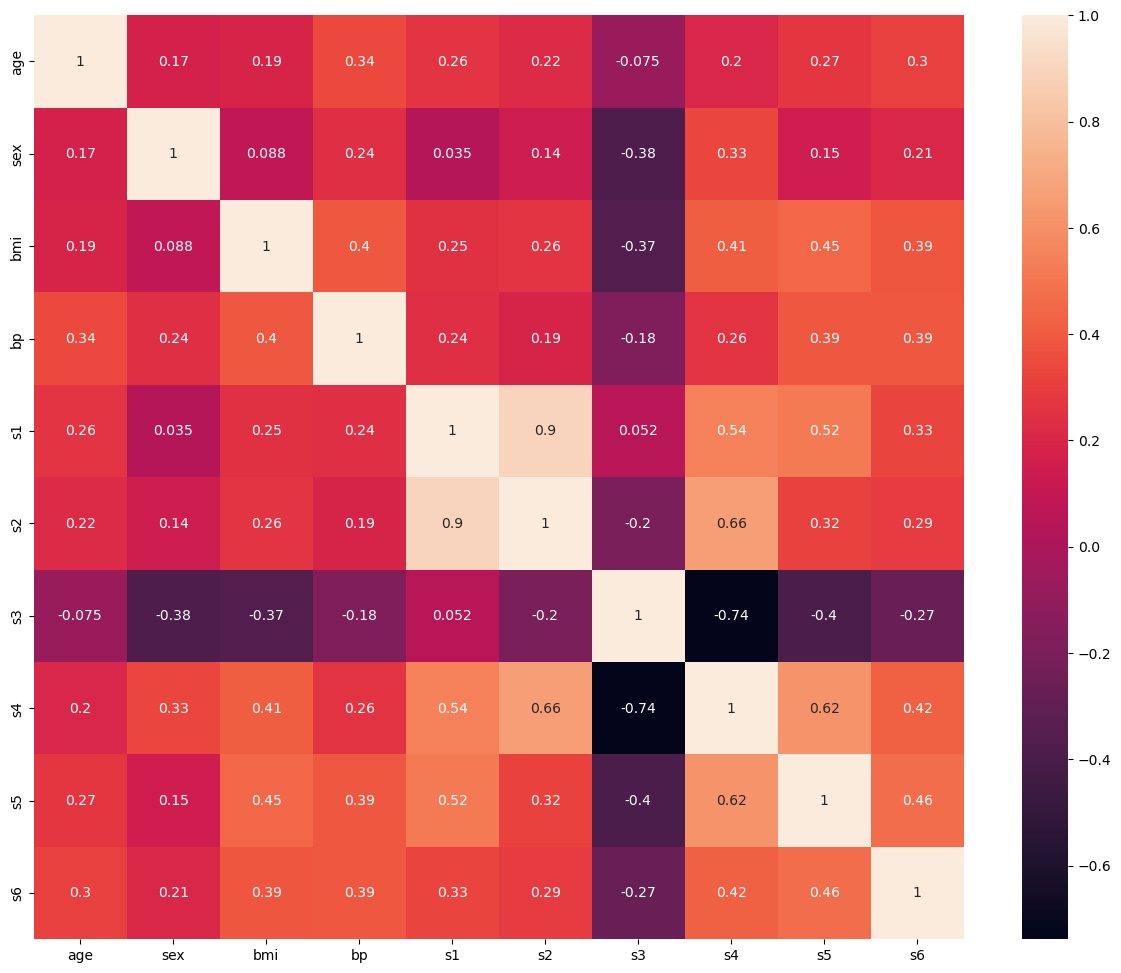

In [68]:
import seaborn as sns 

plt.figure(figsize=(15,12))
sns.heatmap(correlation,annot=True)

In [69]:
# trying to remove the columns which are not needed
n = correlation.shape[0]
columns_to_be_included = []

for i in range(n):
    flag = 1
    for j in range(i):
        if abs(correlation.iloc[i,j]) > 0.7:
            flag = 0
            break
    if(flag):
       columns_to_be_included.append(correlation.columns[i]) 

print(columns_to_be_included)

['age', 'sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']


In [70]:
# X = X[columns_to_be_included]
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [71]:
y = dataset['target']
y[0:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [72]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)


In [73]:
X_test.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788
72,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084492,-0.017646
321,0.096197,-0.044642,0.051996,0.079265,0.054845,0.036577,-0.076536,0.141322,0.098648,0.061054
73,0.012648,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005142,-0.009362


In [74]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()

regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [75]:
from sklearn.metrics import r2_score

y_pred_test_reg = regressor.predict(X_test)

print("R2 Score: ",r2_score(y_test,y_pred_test_reg))

R2 Score:  -0.1858657773221719


In [76]:
print(y_test)

[219.  70. 202. 230. 111.  84. 242. 272.  94.  96.  94. 252.  99. 297.
 135.  67. 295. 264. 170. 275. 310.  64. 128. 232. 129. 118. 263.  77.
  48. 107. 140. 113.  90. 164. 180. 233.  42.  84. 172.  63.  48. 108.
 156. 168.  90.  52. 200.  87.  90. 258. 136. 158.  69.  72. 171.  95.
  72. 151. 168.  60. 122.  52. 187. 102. 214. 248. 181. 110. 140. 202.
 101. 222. 281.  61.  89.  91. 186. 220. 237. 233.  68. 190.  96.  72.
 153.  98.  37.  63. 184. 144. 150. 280. 125.  59.  65. 281. 277. 167.
  90.  72. 178.  88. 270. 101. 197.  97.  53.  71. 262.  52. 102. 166.
 189. 173. 220. 206.  97.  60.  61. 242. 121. 128. 104. 265. 132. 283.
 174. 129. 257. 137.  63.  93. 232. 208. 261. 179. 258. 262.  51. 237.
  71. 139. 268.  69. 317. 249.]


In [77]:
print(y_pred_test_reg)

[196. 225.  78. 310.  51. 230. 233. 235. 292. 196. 111. 144. 143. 270.
  25.  83. 178. 200. 113. 131.  78.  89.  49. 163. 141. 202. 293.  81.
  59. 177. 279.  55. 196. 152. 150. 180.  93.  85. 259.  96.  39. 118.
 252. 277. 134.  75.  31. 148.  39. 185. 144.  72. 142.  59. 292. 142.
 104. 288.  63.  64. 128. 147. 141. 177.  83. 296. 163. 197. 185. 107.
 163. 244. 152. 214.  96. 248. 235. 178. 131. 248.  49.  68. 160.  80.
  92.  59.  85.  55. 147. 270.  85. 175.  43.  77.  96. 143. 252.  90.
 144.  75. 270. 114. 275. 142. 196. 150. 200. 127. 128. 235. 139. 221.
 217. 178. 111. 245. 214.  42. 143. 246. 276. 104.  78. 235.  47. 197.
 151. 199.  94. 142. 230.  92. 221. 246. 275.  85. 275.  91.  53. 233.
  72. 235.  84.  42. 259. 229.]


### So lets do hyper-parameter tunning


In [78]:
params = {
    'criterion': ['squared_error','friedman_mse','absolute_error'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5,10,15,20,25],  # just for this dataset
    'max_features': ['auto','sqrt','log2']
}
params

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [83]:
import warnings
from sklearn.model_selection import GridSearchCV 

warnings.filterwarnings('ignore')
model = DecisionTreeRegressor()
grid = GridSearchCV(estimator=model,param_grid=params,cv=5,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=squared_er

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=2)

In [84]:
grid.best_score_

0.3219733404937341

In [85]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [86]:
y_pred_test_hyper = grid.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred_test_hyper))

R2 score:  0.3425920627800425


In [88]:
fit_model = DecisionTreeRegressor(criterion=grid.best_params_['criterion'],max_depth=grid.best_params_['max_depth'],max_features=grid.best_params_['max_features'],splitter=grid.best_estimator_.splitter)


In [90]:
fit_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='sqrt')

[Text(0.5092592592592593, 0.9166666666666666, 'x[8] <= 0.022\nsquared_error = 6015.949\nsamples = 296\nvalue = 151.983'),
 Text(0.25462962962962965, 0.75, 'x[2] <= 0.005\nsquared_error = 4475.699\nsamples = 199\nvalue = 125.156'),
 Text(0.3819444444444445, 0.8333333333333333, 'True  '),
 Text(0.14814814814814814, 0.5833333333333334, 'x[0] <= 0.027\nsquared_error = 2675.799\nsamples = 144\nvalue = 104.75'),
 Text(0.07407407407407407, 0.4166666666666667, 'x[8] <= -0.043\nsquared_error = 2429.626\nsamples = 108\nvalue = 97.148'),
 Text(0.037037037037037035, 0.25, 'x[3] <= -0.002\nsquared_error = 1428.802\nsamples = 36\nvalue = 77.444'),
 Text(0.018518518518518517, 0.08333333333333333, 'squared_error = 1525.31\nsamples = 29\nvalue = 83.0'),
 Text(0.05555555555555555, 0.08333333333333333, 'squared_error = 371.388\nsamples = 7\nvalue = 54.429'),
 Text(0.1111111111111111, 0.25, 'x[3] <= 0.115\nsquared_error = 2638.861\nsamples = 72\nvalue = 107.0'),
 Text(0.09259259259259259, 0.08333333333333

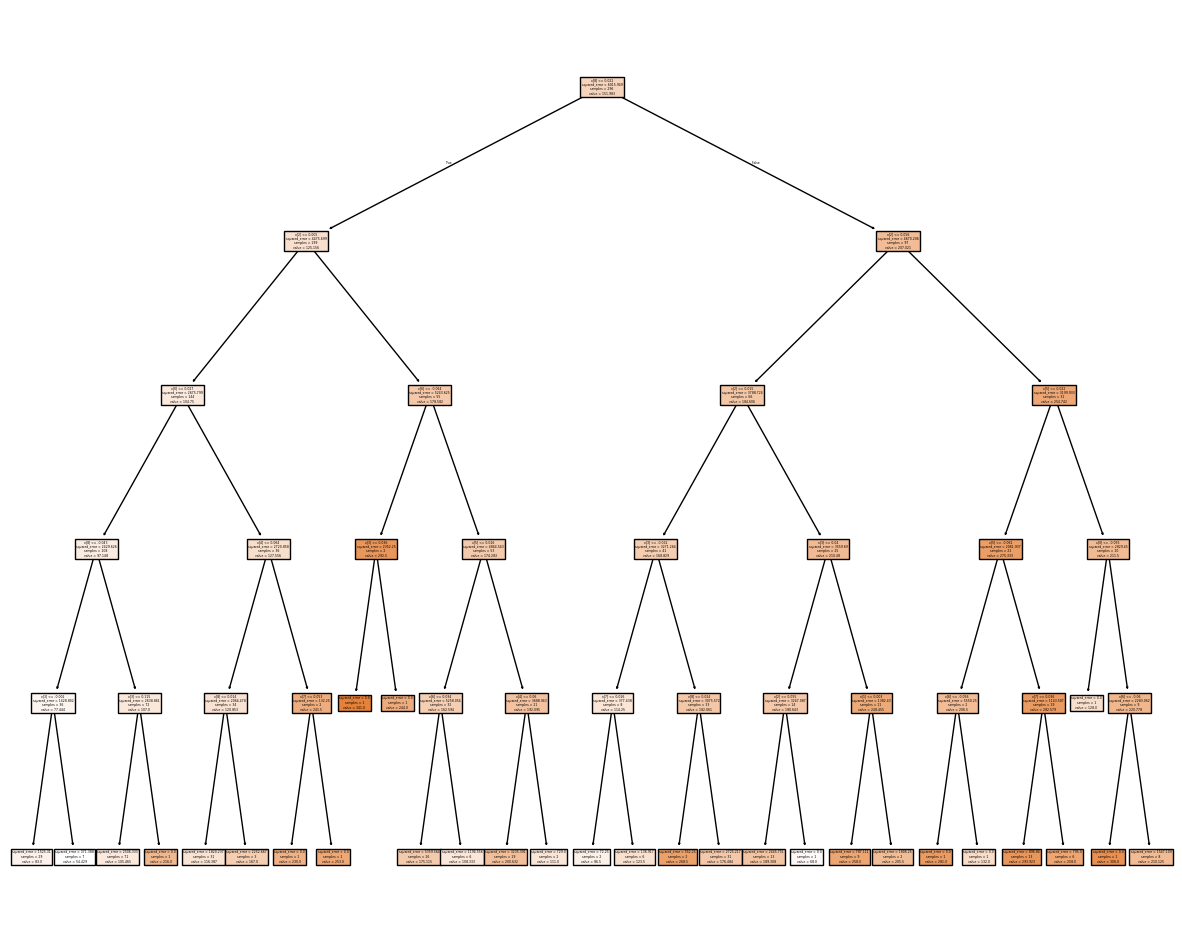

In [92]:
from sklearn import tree 

plt.figure(figsize=(15,12))
tree.plot_tree(fit_model,filled=True)